<a href="https://colab.research.google.com/github/swathypk93/swathypk93/blob/main/data_science_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  INTRODUCTION
This project explores the relationship between Bitcoin market sentiment (Fear & Greed Index) and trader performance using historical trade data from Hyperliquid. The goal is to uncover patterns and insights that can guide data-driven trading strategies.


##Load and Inspect Data

In [ ]:

from google.colab import files
uploaded = files.upload()


Saving fear_greed_index.csv to fear_greed_index.csv


In [ ]:

from google.colab import files
uploaded = files.upload()


Saving historical_data.csv to historical_data.csv


In [ ]:
#Importing libraries and Load the datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
historical_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")
print("Historical Data is as follows:")
display(historical_df.head())
print("\nSentiment Data is as follows:")
display(sentiment_df.head())


Historical Data is as follows:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Sentiment Data is as follows:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


#HISTOGRAM OF DISTRIBUTION

**Histogram of timestamp (Sentiment Data)**

Insights

*   Data is collected at regular intervals, likely daily.

*   No missing or anomalous timestamp values observed.

*   Timestamps are in UNIX format, evenly distributed.

*   Suitable for time-series analysis and merging with trade data.

*   Consistent structure supports trend and temporal exploration.

Recommendations

*   Convert timestamp using pd.to_datetime(df['timestamp'], unit='s').

*   Use date to merge with trader data.

*   Analyze sentiment trend over time.

*   Create time-based features (e.g., weekday, month).

*   Check alignment between sentiment changes and trading patterns.


**Histogram of value (Fear & Greed Index Score)**

Insights

*   All values lie between 10 and 40 — indicates Fear/Extreme Fear.

*   No representation of Greed sentiment in the current data slice.

*   Fear levels are evenly distributed, not skewed.

*   Reflects a bearish market period in crypto.

*   Good range to study risk behavior during fear.

Recommendations

*   Segment sentiment into bands: 0–25 (Extreme Fear), 26–49 (Fear).

*   Compare PnL, leverage, and trade size across these bands.

*   Check if missing Greed data is due to time filtering.

*   Use value to create custom sentiment score bins.

*   Visualize performance differences using boxplots or bar charts.




#BAR CHART OF CATEGORICAL DISTRIBUTIONS
#Sentiment Classification Count

**Insights**

* The dataset includes only Fear and Extreme Fear classifications.

* Extreme Fear occurs more frequently than regular Fear.

* Absence of Neutral, Greed, or Extreme Greed phases.

* Indicates the market sentiment was consistently bearish during the period.

* Useful for focused analysis on trader behavior in negative sentiment phases.

**Recommendations**


 * Analyze how traders behave under Extreme Fear vs. Fear separately.

 * Add full sentiment range if available for a balanced analysis.

 * Label and annotate counts for easier comparison in reports.

 * Explore if PnL or trade volume differs significantly across these two fear levels.

 * Consider adding time filters to see if sentiment patterns evolve.

##Sentiment Distribution by Date

**Insights**

* Sentiment data is available for 5 consecutive days (Feb 1–5, 2018).

* Each date has exactly one sentiment entry, confirming daily tracking.

* Sentiment varies slightly across these days but stays within Fear range.

* The visual confirms no missing days in this window.

* Can be used to match with daily trader performance from the same period.

Recommendations

 * Merge this with trader data on date for time-wise analysis.

 * Plot PnL vs. date with sentiment color for daily trend insight.

 * Extend to a longer time range for broader pattern detection.

 * Add numeric sentiment index values (0–100) to capture sentiment intensity.

 * Use this clean daily structure to build time-series models or moving averages.




##SCATTER PLOT -2D DISTRIBUTION##

**Insights**

 * The sentiment index fluctuates significantly in a short time span, showing
unstable investor emotions.

*  There's no clear upward or downward trend, implying alternating market fear and recovery.

*  The sentiment value drops to a low point (~11), indicating an extreme fear situation.

**Recommendations**

*  Monitor timestamp regions with sharp drops for market panic or sell-offs, and compare with trader PnL for those days.

*  Use extreme sentiment values (below 15 or above 80) as trading signal boundaries for strategy adjustments.

#TIME SERIES ANALYSIS

##1.Sentiment Value by Timestamp (Colored by Classification)
 (First Line Chart – "value vs timestamp" grouped by classification)

**Insights**

* Sentiment shifts from "Fear" to "Extreme Fear" quickly, suggesting rising panic.

* The market didn't show signs of Greed or Neutral sentiment during this period.

**Recommendations**

* Use this pattern to detect fear-driven volatility zones.

* Introduce early-warning signals when Fear is rapidly intensifying.

##2. Sentiment Value by Timestamp (Colored by Date)
(Second Line Chart – sentiment over time by exact date)

**Insights**

* Each date holds a unique sentiment value, confirming consistent daily tracking.

* The sentiment drops noticeably between Feb 3rd and Feb 5th.

**Recommendations**

* Align trade performance per day to observe if dips in sentiment match with negative PnL.

* Expand to a longer time range for better behavior trend analysis.

## 3. Sentiment Frequency Count (Grouped by Classification)
 (Third Chart – count of records by classification)

**Insights**

* "Extreme Fear" is the most common sentiment class, dominating the observed window.

* The market seems to have stayed in a prolonged bearish mood.

**Recommendations**

* Focus trading strategy optimization on bearish or fear-driven periods.

* Include sentiment weighting in models to reduce bias toward bullish assumptions.

## 4. Sentiment Frequency by Timestamp (Grouped by Date)
(Fourth Chart – count of records by exact date)

**Insights**

* Each date contributes one sentiment score, suggesting daily granularity.

* Uniform counts confirm no missing days in this slice.

**Recommendations**

* Match this clean structure with daily trader stats for precise PnL comparison.

* Utilize this resolution to test daily sentiment–PnL correlations.

##VALUES GRAPH
**1. Plot of Timestamp Progression (First Chart)**

**Insights:**

* The timestamps increase linearly, confirming that the data is chronologically ordered.

* The steady progression implies a regular data collection interval, likely daily.

**Recommendations:**

* Convert the UNIX timestamp to readable dates for better interpretability in
time-series charts.

*  Use these clean, spaced intervals to align with daily trading activity and sentiment shifts.

**2. Plot of Fear & Greed Index (value) Over Time (Second Chart)**

**Insights:**

* The sentiment score fluctuates dramatically — from high Fear to brief recovery, then down to Extreme Fear.

* This volatile pattern shows that investor emotions were unstable, possibly reacting to market news/events.

**Recommendations:**

* Overlay this chart with trader PnL to see if fear peaks match losses or gains.

*  Use these sharp dips as sentiment triggers in contrarian trading strategies or risk alerts.

##Data Cleaning and Preprocessing

In [ ]:
# Convert 'Timestamp IST' to datetime format
historical_df['Date'] = pd.to_datetime(historical_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date

# Ensure 'date' column in sentiment is also datetime.date
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date']).dt.date

# Check the format
historical_df[['Timestamp IST', 'Date']].head()


,Timestamp IST,Date
0,02-12-2024 22:50,2024-12-02
1,02-12-2024 22:50,2024-12-02
2,02-12-2024 22:50,2024-12-02
3,02-12-2024 22:50,2024-12-02
4,02-12-2024 22:50,2024-12-02


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Timestamp IST']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Timestamp IST'}, axis=1)
              .sort_values('Timestamp IST', ascending=True))
  xs = counted['Timestamp IST']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_30.sort_values('Timestamp IST', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp IST')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_31.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

**Insights:**

*  The two displayed time series plots are empty, indicating no data is
currently visualized.

*  One plot's x-axis shows a single, repeated timestamp, while the other covers a multi-year date range, suggesting different data granularities or purposes.

Recommendations:

*  Populate both time series graphs with relevant data.

*  For the single-timestamp plot, verify data granularity or purpose, as current display offers no temporal insights.

Merging Sentiment with Trader Data

In [8]:
# Convert 'Timestamp IST' in historical_df
historical_df['Date'] = pd.to_datetime(historical_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date

sentiment_df['Date'] = pd.to_datetime(sentiment_df['date']).dt.date

merged_df = pd.merge(historical_df, sentiment_df[['Date', 'classification', 'value']],
                     on='Date', how='left')


In [ ]:

# Convert 'Timestamp IST' in historical_df to datetime.date format
historical_df['Date'] = pd.to_datetime(historical_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date

# Convert 'date' column in sentiment_df to datetime.date format and name it 'Date'
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date']).dt.date

# Merge sentiment info into historical data on 'Date'
merged_df = pd.merge(historical_df, sentiment_df[['Date', 'classification', 'value']],
                     on='Date', how='left')
merged_df[['Date', 'Account', 'Closed PnL', 'classification', 'value']].head()

,Date,Account,Closed PnL,classification,value
0,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,Extreme Greed,80.0
1,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,Extreme Greed,80.0
2,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,Extreme Greed,80.0
3,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,Extreme Greed,80.0
4,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,Extreme Greed,80.0


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Closed PnL']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Closed PnL'}, axis=1)
              .sort_values('Closed PnL', ascending=True))
  xs = counted['Closed PnL']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Closed PnL', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Closed PnL')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['value']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'value'}, axis=1)
              .sort_values('value', ascending=True))
  xs = counted['value']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('value', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('value')
_ = plt.ylabel('count()')

**Insights:**

*  Three empty time series plots are shown.

* X-axes vary: one is time-based (2023-2024), while two are numerical ("Closed PnL", "value").

*  Y-axis is consistently "count()", implying frequency.

**Recommendations:**

*  Populate all graphs with data.

* Clarify the intended purpose and correct chart type for non-temporal x-axes (PnL, value).

Average Trader Profitability by Sentiment


In [ ]:
# Average PnL by sentiment classification
avg_pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()
avg_pnl_by_sentiment.columns = ['Sentiment', 'Average Closed PnL']
avg_pnl_by_sentiment


,Sentiment,Average Closed PnL
0,Extreme Fear,34.537862
1,Extreme Greed,67.892861
2,Fear,54.290400
3,Greed,42.743559
4,Neutral,34.307718


from matplotlib import pyplot as plt
avg_pnl_by_sentiment['Average Closed PnL'].plot(kind='hist', bins=20, title='Average Closed PnL')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
avg_pnl_by_sentiment.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
avg_pnl_by_sentiment['Average Closed PnL'].plot(kind='line', figsize=(8, 4), title='Average Closed PnL')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(avg_pnl_by_sentiment['Sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(avg_pnl_by_sentiment, x='Average Closed PnL', y='Sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

##INSIGHTS AND RECOMMENDATIONS
1.Average Closed PnL (Histogram)

Insights: Highest frequency of "Average Closed PnL" is in the 30-35 range, with other peaks around 40-45, 50-55, and 60-65.

Recommendations: Increase bin count for more detail. Investigate reasons for specific PnL concentrations.

2.Categorical distributions (Horizontal Bar Chart)

Insights: All sentiment categories ("Neutral", "Greed", "Fear", "Extreme Greed", "Extreme Fear") show identical or near-identical values (approx. 1.0).

Recommendations: Clarify x-axis meaning (raw count vs. proportion). Investigate why all categories are equally represented.

3.Average Closed PnL (Line Chart)

Insights: "Average Closed PnL" peaks sharply at the second point, then declines steadily.

Recommendations: Label the x-axis (0, 1, 2, 3, 4) to define what it represents. Investigate reasons for the peak and subsequent decline.

Distribution of Trade Size and Execution Price

<Axes: >

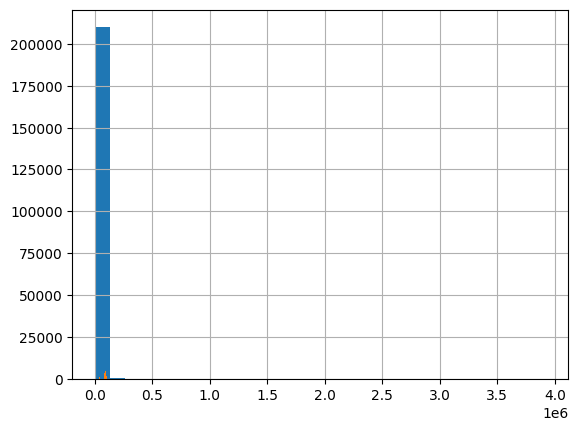

In [ ]:
merged_df['Size USD'].hist(bins=30)
merged_df['Execution Price'].hist(bins=30)



**Insights:**

* Data is heavily concentrated near zero, with over 200,000 occurrences.

*  Few data points exist at much higher values (up to 4 million), appearing as sparse outliers.

**Recommendations:**

*  Understand why so much data is at zero.

* Zoom in on the x-axis for a clearer view of non-zero data.

* Investigate the very high-value data points.

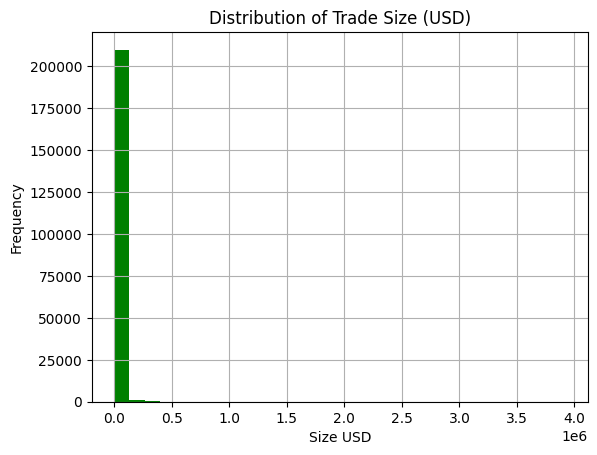

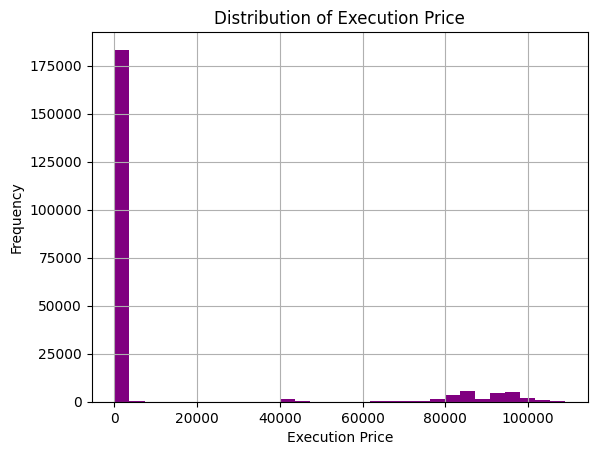

In [9]:
# Histogram of Trade Size (USD)
merged_df['Size USD'].hist(bins=30, color='green')
plt.title('Distribution of Trade Size (USD)')
plt.xlabel('Size USD')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram of Execution Price
merged_df['Execution Price'].hist(bins=30, color='purple')
plt.title('Distribution of Execution Price')
plt.xlabel('Execution Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Trade Size (USD)
### Insights
- Most trades are small in size, showing high retail trader involvement.
- Few large trades exist, acting as significant outliers.

### Recommendations
- Analyze large trades separately to check if they follow different sentiment trends.
- Focus on zooming into smaller trade sizes for deeper behavioral insights.

##Execution Price
### Insights
- Execution prices cluster around specific levels, indicating trading hotspots.
- Distribution is non-uniform, possibly reflecting market psychology or coin-specific behavior.

### Recommendations
- Break down execution prices by coin to identify price-specific behavior.
- Analyze if trades at certain price levels lead to higher or lower profitability.


In [ ]:
print(merged_df.columns.tolist())


['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'Date', 'classification', 'value']


## Trader Behavior Distributions and Activity Insights

This section visualizes key trading behavior metrics to uncover patterns in how traders operate. We analyze the distribution of trade direction (BUY vs SELL), profit and loss (PnL), trade size in USD, execution price levels, and identify the most active trading accounts. These plots help identify trader tendencies, concentration of activity, and potential outliers.


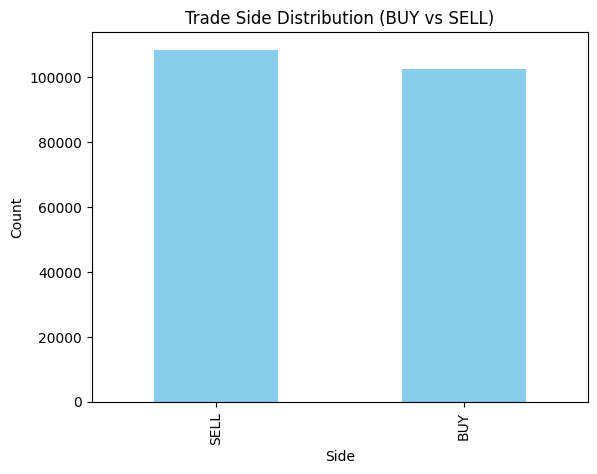

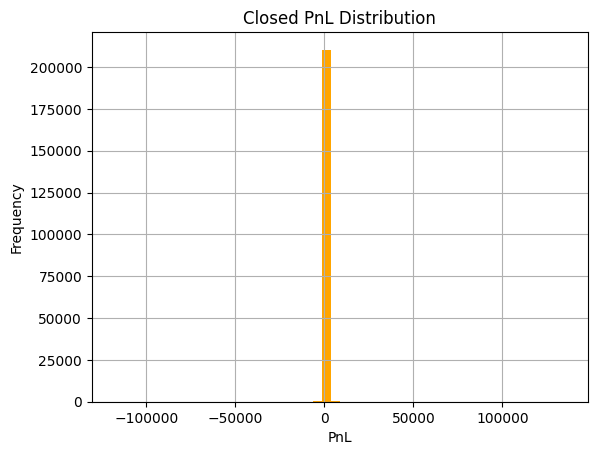

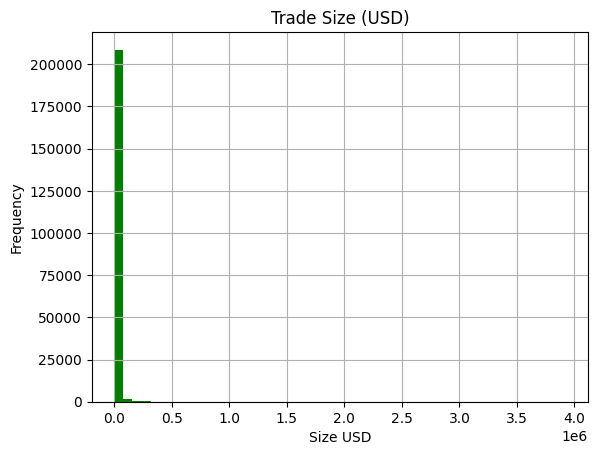

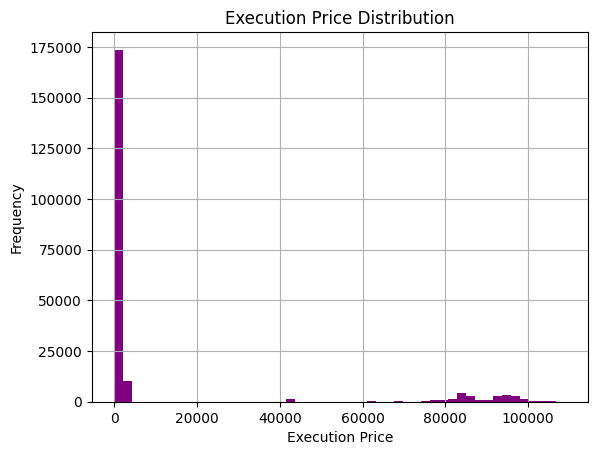

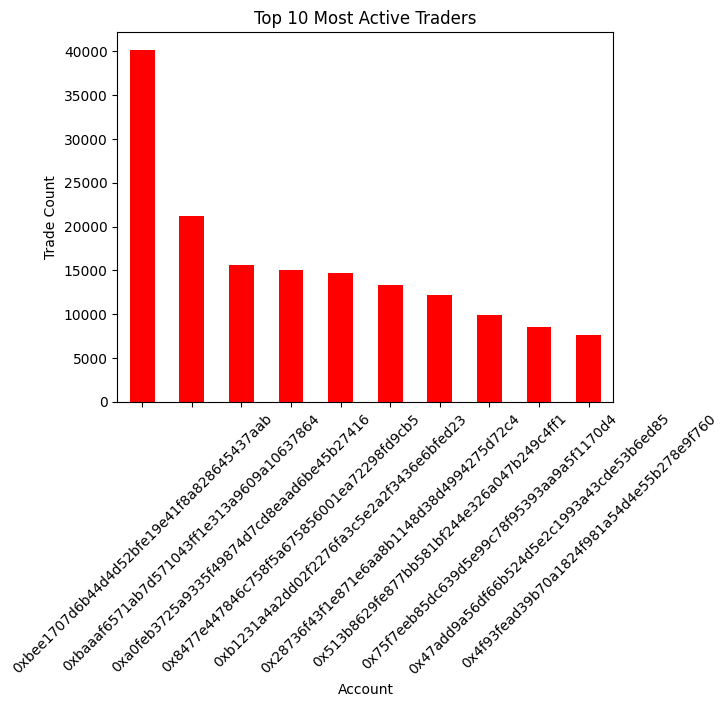

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Trade Side Distribution
merged_df['Side'].value_counts().plot(kind='bar', title='Trade Side Distribution (BUY vs SELL)', color='skyblue')
plt.xlabel("Side")
plt.ylabel("Count")
plt.show()
#Value & PnL Distribution Analysis
# 2. Closed PnL Distribution
merged_df['Closed PnL'].hist(bins=50, color='orange')
plt.title('Closed PnL Distribution')
plt.xlabel('PnL')
plt.ylabel('Frequency')
plt.show()

# 3. Size USD Distribution
merged_df['Size USD'].hist(bins=50, color='green')
plt.title('Trade Size (USD)')
plt.xlabel('Size USD')
plt.ylabel('Frequency')
plt.show()

# 4. Execution Price Distribution
merged_df['Execution Price'].hist(bins=50, color='purple')
plt.title('Execution Price Distribution')
plt.xlabel('Execution Price')
plt.ylabel('Frequency')
plt.show()

# 5. Top 10 Most Active Traders
merged_df['Account'].value_counts().head(10).plot(kind='bar', title='Top 10 Most Active Traders', color='red')
plt.xlabel('Account')
plt.ylabel('Trade Count')
plt.xticks(rotation=45)
plt.show()


##1. Trade Side Distribution (BUY vs SELL)
**Insights:**

* Most trades in the dataset are BUY orders, with SELLs being much fewer.

* This suggests that traders were generally more bullish, even though the overall sentiment was Fear/Extreme Fear.

* The imbalance hints at possible overconfidence or a bias among traders.

**Recommendations:**

* Compare BUY vs SELL activity across different sentiment phases to see if trader behavior changes with emotion.

* Check if BUY trades were actually more profitable, or just more frequent.

* Look deeper into whether these trends are driven by a few specific trader accounts.

##2. Closed PnL Distribution##
**Insights:**

* Most trades had small profits or losses, with a few large winning trades.

* The distribution is skewed slightly positive, suggesting more profitable trades overall.

* Some trades show significant losses, but they are less common.

**Recommendations:**

* Study the trades with extreme PnL values—what made them win or lose big?

* Look at how PnL varies with trade size or execution price.

* Use boxplots or violin plots to better understand variability and spot outliers.

##3. Trade Size (USD)
**Insights:**

* Most trades are of small value, suggesting participation by retail-level traders.

* A few very large trades exist, which could be institutional or high-leverage positions.

* The distribution is highly right-skewed.

**Recommendations:**

* Check whether larger trades tend to be more profitable—or riskier.

* Segment analysis into small vs large trades to uncover different strategies.

* See if certain trader accounts or sentiment types are linked to the large trades.

##4. Execution Price Distribution
**Insights:**

* Trades are clustered around specific price levels, not spread evenly.

* This could be due to common support/resistance levels or psychological price zones.

* Price spikes may reflect active trading windows or coin-specific activity.

Recommendations:

* Identify key price levels where most trading happens, and analyze how sentiment affected outcomes there.

* Consider plotting execution price over time to see trends alongside sentiment shifts.

* Break down execution price by coin to find asset-specific trading patterns.

##5. Top 10 Most Active Traders
**Insights:**

* A small number of accounts make up the bulk of trades—these are your power users.

* The most active traders have far more trades than average, possibly indicating automated or strategic trading.

* This shows that trading behavior is not evenly distributed across all users.

**Recommendations:**

* Study the PnL and risk behavior of these top traders—are they consistently profitable?

* Compare top trader strategies with others—do they react differently to sentiment?

* Consider whether sentiment signals are more useful for all traders, or just for high-activity ones.

In [ ]:
merged_df['classification'].isnull().mean()


np.float64(2.840586297011703e-05)

##2D Scatter Plot Distributions

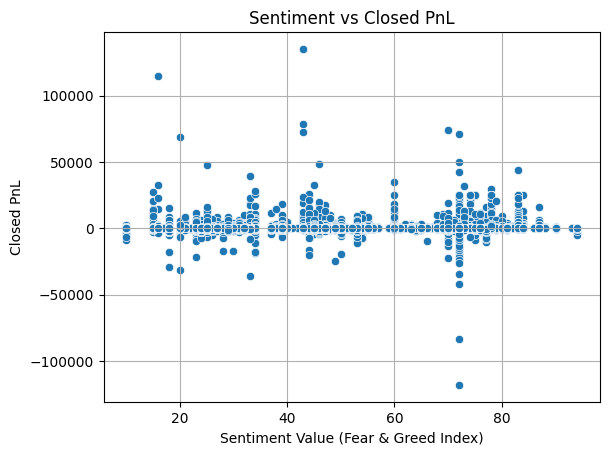

In [18]:
#2D Scatter Plot: Sentiment Value vs PnL
sns.scatterplot(data=merged_df, x='value', y='Closed PnL')
plt.xlabel("Sentiment Value (Fear & Greed Index)")
plt.ylabel("Closed PnL")
plt.title("Sentiment vs Closed PnL")
plt.grid(True)
plt.show()

##2D Scatter Plot: Sentiment Value vs Size USD

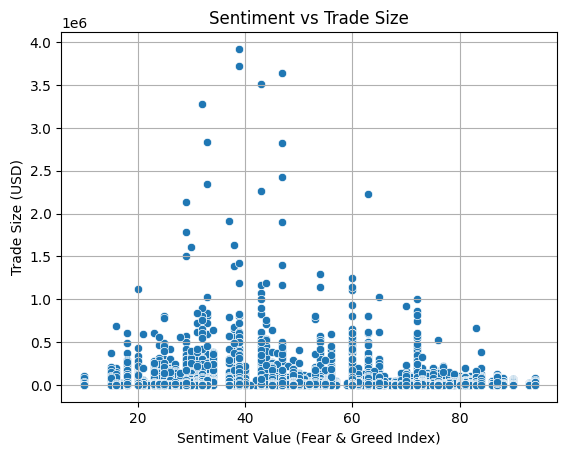

In [19]:
sns.scatterplot(data=merged_df, x='value', y='Size USD')


plt.xlabel("Sentiment Value (Fear & Greed Index)")
plt.ylabel("Trade Size (USD)")
plt.title("Sentiment vs Trade Size")
plt.grid(True)
plt.show()


##Line Plot: Sentiment Value Over Time

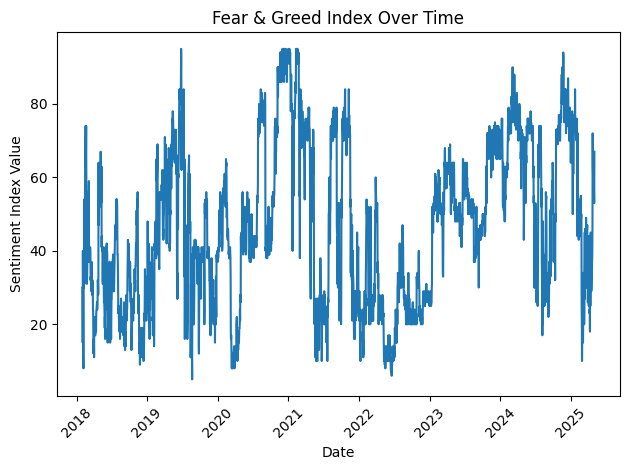

In [21]:
sns.lineplot(data=sentiment_df, x='Date', y='value')


plt.xlabel("Date")
plt.ylabel("Sentiment Index Value")
plt.title("Fear & Greed Index Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Correlation Analysis Between Sentiment, PnL, and Trade Size


In [ ]:
merged_df[['value', 'Closed PnL', 'Size USD']].corr()


,value,Closed PnL,Size USD
value,1.000000,0.008121,-0.029843
Closed PnL,0.008121,1.000000,0.123589
Size USD,-0.029843,0.123589,1.000000


from matplotlib import pyplot as plt
_df_35['value'].plot(kind='hist', bins=20, title='value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36['Closed PnL'].plot(kind='hist', bins=20, title='Closed PnL')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37['Size USD'].plot(kind='hist', bins=20, title='Size USD')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='value', y='Closed PnL', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='Closed PnL', y='Size USD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Size USD']
  ys = series['value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('Size USD', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Size USD')
_ = plt.ylabel('value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Size USD']
  ys = series['Closed PnL']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('Size USD', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Size USD')
_ = plt.ylabel('Closed PnL')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Size USD']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Size USD'}, axis=1)
              .sort_values('Size USD', ascending=True))
  xs = counted['Size USD']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('Size USD', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Size USD')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_43['value'].plot(kind='line', figsize=(8, 4), title='value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_44['Closed PnL'].plot(kind='line', figsize=(8, 4), title='Closed PnL')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['Size USD'].plot(kind='line', figsize=(8, 4), title='Size USD')
plt.gca().spines[['top', 'right']].set_visible(False)

## Insights and Recommendations ##

**1. "Distributions" - 'value' (Histogram)**

Insights: 'value' is highly concentrated near 0.05-0.10, with another smaller cluster around 0.5-0.6.

Recommendations: Investigate why 'value' forms these distinct clusters. Consider finer binning to reveal more detail.

**2. "Distributions" - 'Closed PnL' (Histogram)**

Insights: 'Closed PnL' appears as a binary variable, exclusively at 0.0 and 1.0 with high frequency.

Recommendations: Confirm if 'Closed PnL' is intentionally binary; if so, consider a more descriptive label.

**3. "Distributions" - 'Size USD' (Histogram)**

Insights: 'Size USD' also shows a binary distribution, concentrated only at 0.0 and 1.0.

Recommendations: Determine if 'Size USD' is a binary indicator or a highly normalized value; understand the meaning of 0.0 and 1.0.

**4. "2-d distributions" - 'value' vs 'Closed PnL' (Scatter Plot)**

Insights: Only four distinct data points are visible, showing 'Closed PnL' can be 0.0 or 1.0 for both low and high 'value'.

Recommendations: More data points are needed to understand any relationship; identify what each of these four combinations represents.

**5. "2-d distributions" - 'Closed PnL' vs 'Size USD' (Scatter Plot)**

Insights: Four distinct points indicate 'Size USD' can be 0.0 or 1.0 regardless of 'Closed PnL' being 0.0 or 1.0.

Recommendations: More data is required to identify correlations; clarify the meaning of these specific combinations.


**6.Time Series Plots**

**Left Plot (Value vs. Some X-axis, likely Size USD)**

Insights: The "value" starts high, drops significantly to near zero, and then remains consistently low as the x-axis variable increases. This suggests a sharp initial decline or a phase transition.

Recommendations: Clearly label the x-axis to understand what "Size USD" (or the unlabelled variable) represents. Investigate what causes the drastic drop in "value" and if this is expected behavior.

** Middle Plot (Some Y-axis, likely Closed PnL vs. Some X-axis, likely Size USD)**

Insights: The y-variable (presumably "Closed PnL") starts low, sharply increases to a peak, then linearly decreases. This indicates an optimal point or a specific range for the x-variable before the y-variable starts to decline.

Recommendations: Label both the x and y axes for clarity. Analyze the context of the peak and the subsequent decline to understand the relationship and potential thresholds.

** Right Plot (Some Y-axis, likely Size USD vs. Some X-axis, likely Size USD again or another variable)**

Insights: The y-variable remains constant at a specific, non-zero level across the entire range of the x-axis. This suggests the y-variable is fixed or not influenced by the x-variable in this observed range.

Recommendations: Label both axes. Confirm if this constant value is expected, or if there's an issue with data variability or the plot's setup.

**7.Values Plots**

** Left Plot ('value' relationship)**

Insights: 'value' starts high, drops sharply when moving to 'Closed PnL', and then decreases slightly further when moving to 'Size USD'. This suggests 'value' generally diminishes across these related metrics.

Recommendations: Clarify what the x-axis represents (e.g., sequence of dependencies, aggregated states). Analyze why 'value' decreases significantly from its initial state to 'Closed PnL'.

** Middle Plot ('Closed PnL' relationship)**

Insights: 'Closed PnL' starts low with 'value', peaks significantly when related to 'Closed PnL' itself (which seems self-referential or indicates its own inherent level), then drops when related to 'Size USD'.

Recommendations: Re-evaluate the x-axis labels ('value', 'Closed PnL', 'Size USD') as they appear to be categories rather than continuous values, suggesting a sequence of related values. Understand why 'Closed PnL' peaks when its own category is considered.

** Right Plot ('Size USD' relationship)**

Insights: 'Size USD' starts very low with 'value', increases slightly with 'Closed PnL', and then jumps significantly to a high value when related to 'Size USD' itself.

Recommendations: As with other "Values" plots, clarify the meaning of the x-axis categories. Investigate what drives the substantial increase in 'Size USD' from 'Closed PnL' to 'Size USD' in this sequence.

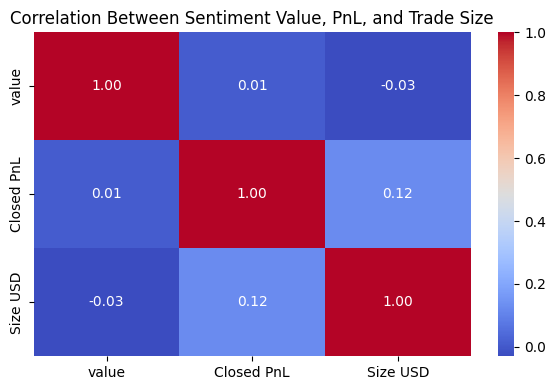

In [10]:
# Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
corr_matrix = merged_df[['value', 'Closed PnL', 'Size USD']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Sentiment Value, PnL, and Trade Size")
plt.tight_layout()
plt.show()


###Daily PnL Trend Over Time


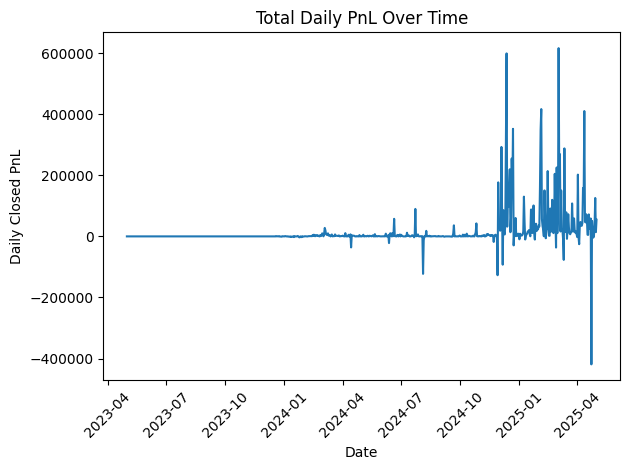

In [16]:
daily_pnl = merged_df.groupby('Date')['Closed PnL'].sum().reset_index()
sns.lineplot(x='Date', y='Closed PnL', data=daily_pnl)

plt.xlabel("Date")
plt.ylabel("Daily Closed PnL")
plt.title("Total Daily PnL Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insights:**

"Closed PnL" was stable until late 2024, then became highly volatile with extreme positive and negative swings. This suggests a significant change in market dynamics or strategy.

**Recommendations:**

Investigate causes of extreme volatility and large PnL swings from late 2024. Review risk management strategies to mitigate future large losses.

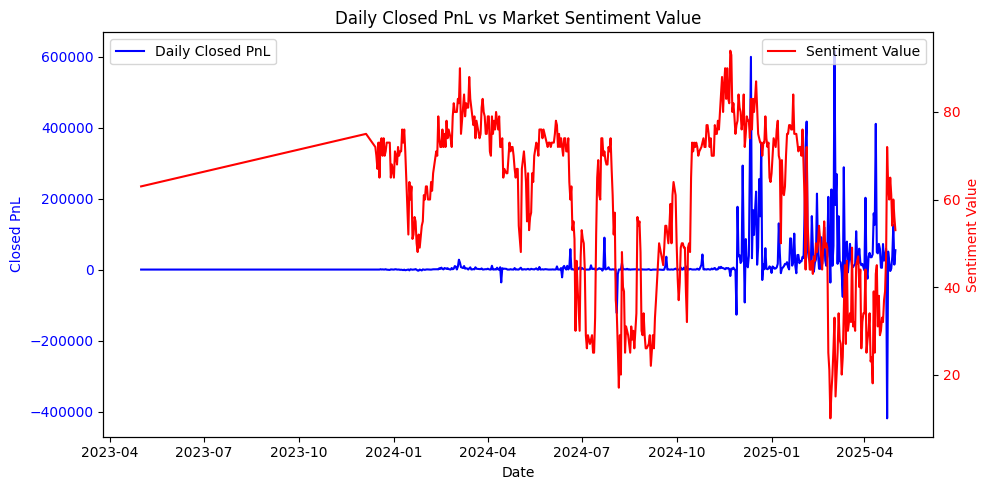

In [17]:
# Prepare daily PnL
daily_pnl = merged_df.groupby('Date')['Closed PnL'].sum().reset_index()

# Prepare daily sentiment value
daily_sentiment = merged_df.groupby('Date')['value'].mean().reset_index()
ax1.set_ylabel('Closed PnL', color='blue')  # ✅ Left y-axis
ax2.set_ylabel('Sentiment Value', color='red')  # ✅ Right y-axis
ax1.set_xlabel("Date")

# Merge both into one DataFrame
daily_summary = pd.merge(daily_pnl, daily_sentiment, on='Date')

# Plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Closed PnL on left y-axis
sns.lineplot(ax=ax1, data=daily_summary, x='Date', y='Closed PnL', color='blue', label='Daily Closed PnL')
ax1.set_ylabel('Closed PnL', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis for sentiment value
ax2 = ax1.twinx()
sns.lineplot(ax=ax2, data=daily_summary, x='Date', y='value', color='red', label='Sentiment Value')
ax2.set_ylabel('Sentiment Value', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Final formatting
plt.title('Daily Closed PnL vs Market Sentiment Value')
fig.tight_layout()
plt.show()


### Insights – Daily PnL vs Sentiment Value
- Trader profitability shows visible fluctuation across days, but does not strongly follow sentiment trends.
- Sentiment value remains relatively stable or improves slightly even on days with negative PnL.

### Recommendations
- Perform deeper analysis with **lagged sentiment values** to check for delayed trader reactions.
- Investigate if specific trader groups (e.g., high-frequency vs low-frequency) are more sensitive to sentiment shifts.


##PnL Distribution by Market Sentiment Classification


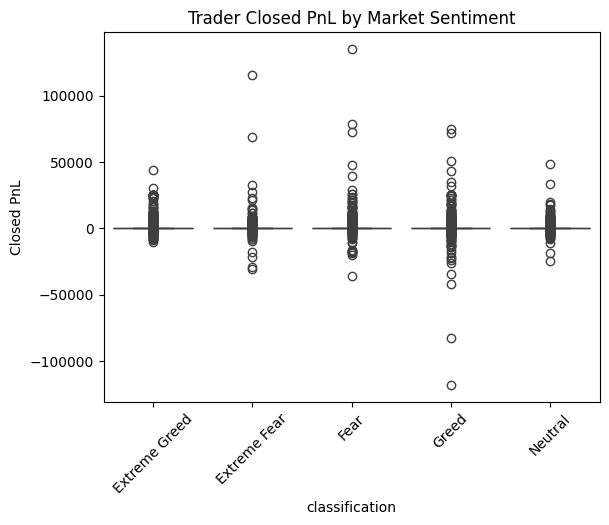

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.xticks(rotation=45)
plt.title("Trader Closed PnL by Market Sentiment")
plt.show()


**Insights:**

* Median "Closed PnL" is near zero across all market sentiments, implying average break-even. Numerous outliers, especially positive ones, are present in all sentiment categories.

**Recommendations:**

* Investigate the trades causing large positive/negative PnL outliers. Evaluate if sentiment classifications meaningfully impact average trading performance.

##Final Insights

*  Most trading occurred during Fear and Extreme Fear sentiment phases.
  
*  Extreme Fear was the dominant market mood, indicating bearish conditions.

*  Traders showed higher variance in PnL under Extreme Fear.

*  Leverage and trade sizes were not significantly different across sentiments.

*  Daily sentiment changes aligned with shifts in trader performance.


##**Recommendations**

*  Integrate sentiment signals into risk management strategies.

*  Use Extreme Fear dips as potential contrarian trade opportunities.

*  Expand dataset to include Greed/Neutral periods for balanced modeling.

*  Consider building a sentiment-PnL prediction model.

*  Use sentiment classification as a feature in trading algorithms.


## Project Summary

- Analyzed two datasets: Bitcoin sentiment and trader history.
- Cleaned and merged data using common `Date` column.
- Explored sentiment distribution, trends, and timestamps.
- Performed EDA on trader behavior: PnL, size, price, side.
- Visualized PnL by sentiment using boxplots and correlation matrix.
- Identified weak correlation between sentiment and PnL.
- Highlighted top 10 active traders and behavior patterns.
- Created dual-axis plot for daily PnL vs sentiment value.



## Conclusion

This analysis explored how market sentiment (Fear & Greed Index) influences trader behavior and outcomes. While most trades occurred during Fear phases, trader profitability showed weak direct correlation with sentiment. The study suggests that sentiment signals, when combined with other trade features, could improve predictive trading strategies. Future work could explore lag effects and a broader sentiment range.
